In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/retail_store_inventory.csv')

# Display the first 5 rows of the dataset
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


# Data quality check

In [ ]:
# Display the shape of the dataset
data.shape

(73100, 15)

In [15]:
# Display basic stats of the dataset
data.describe(include='all')

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
count,73100,73100,73100,73100,73100,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100,73100.000000,73100.000000,73100
unique,731,5,20,5,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4
top,2024-01-01,S001,P0001,Furniture,East,NaN,NaN,NaN,NaN,NaN,NaN,Sunny,NaN,NaN,Spring
freq,100,14620,3655,14699,18349,NaN,NaN,NaN,NaN,NaN,NaN,18290,NaN,NaN,18317
mean,NaN,NaN,NaN,NaN,NaN,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,NaN,0.497305,55.146077,NaN
std,NaN,NaN,NaN,NaN,NaN,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,NaN,0.499996,26.191408,NaN
min,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,NaN,0.000000,5.030000,NaN
25%,NaN,NaN,NaN,NaN,NaN,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,NaN,0.000000,32.680000,NaN
50%,NaN,NaN,NaN,NaN,NaN,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,NaN,0.000000,55.010000,NaN
75%,NaN,NaN,NaN,NaN,NaN,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,NaN,1.000000,77.820000,NaN


As we can see, there are no missing values, this is because was synthetically  produced, also there are no anomalies such as negative prices,inventory or sells

In [ ]:
# Display the number of unique values in each column
data.nunique()

Date                    731
Store ID                  5
Product ID               20
Category                  5
Region                    4
Inventory Level         451
Units Sold              498
Units Ordered           181
Demand Forecast       31608
Price                  8999
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     9751
Seasonality               4
dtype: int64

In [6]:
# Display data types
data.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

We can see that the column 'Date' is an object, we will have to transform this later

In [ ]:
# Display column names
data.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

We have a column called "Demand forecas" but we will not use this column, we will produce our own forecast

In [ ]:
print(data['Store ID'].value_counts())
print(data['Category'].value_counts())
print(data['Seasonality'].value_counts())
print(data['Region'].value_counts())

Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64
Seasonality
Spring    18317
Summer    18305
Winter    18285
Autumn    18193
Name: count, dtype: int64
Region
East     18349
South    18297
North    18228
West     18226
Name: count, dtype: int64


As we can see the dataframe is well balanced, this is also because it was synthetically produced

<Axes: >

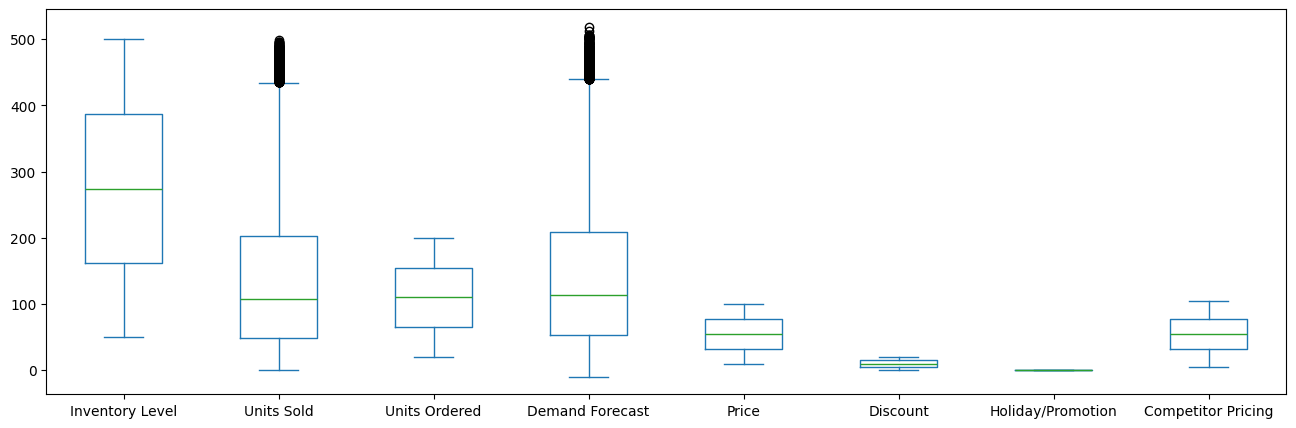

In [ ]:
# Outlier check
data.plot(kind='box', figsize=(16, 5))


We can also see that there are columns with some visible outliers such as "Units Sold" and "Demand Forecast", we will not be using the "Demand Forecast" column so we will just have to work with the "Units Sold" column

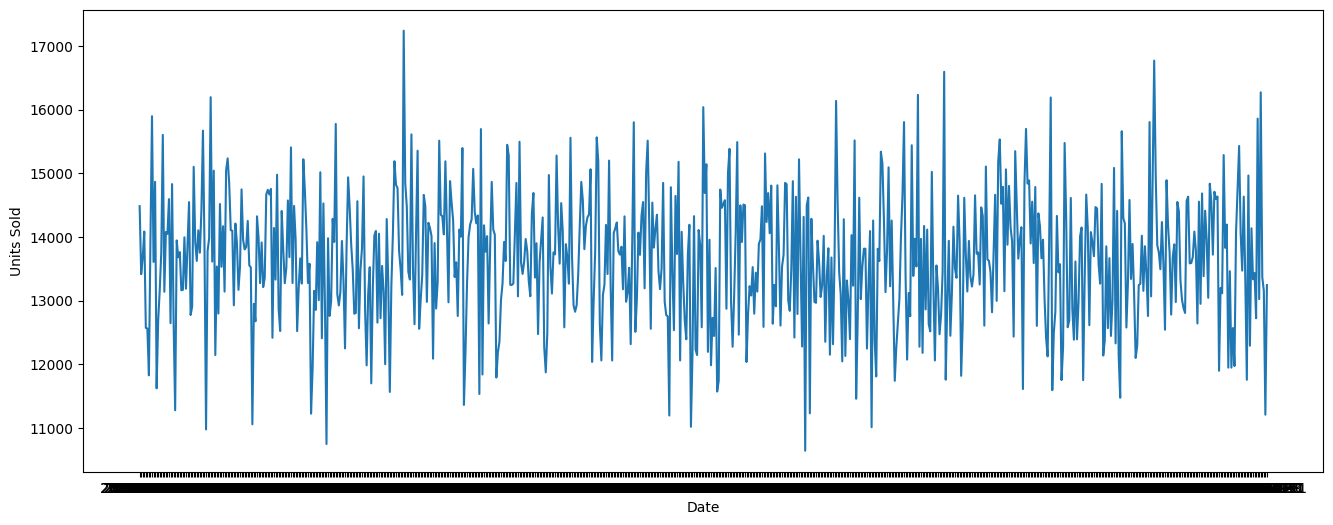

In [23]:
# We group the data by 'Date' and sum the 'Units Sold' to analyze sales trends over time at a general level
data_sells_by_date = data.groupby(['Date'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=data_sells_by_date, x='Date', y='Units Sold')
plt.show()

No apparent trend at a general level, we will need to explore the data at a product ID level

<Axes: xlabel='Store ID', ylabel='Units Sold'>

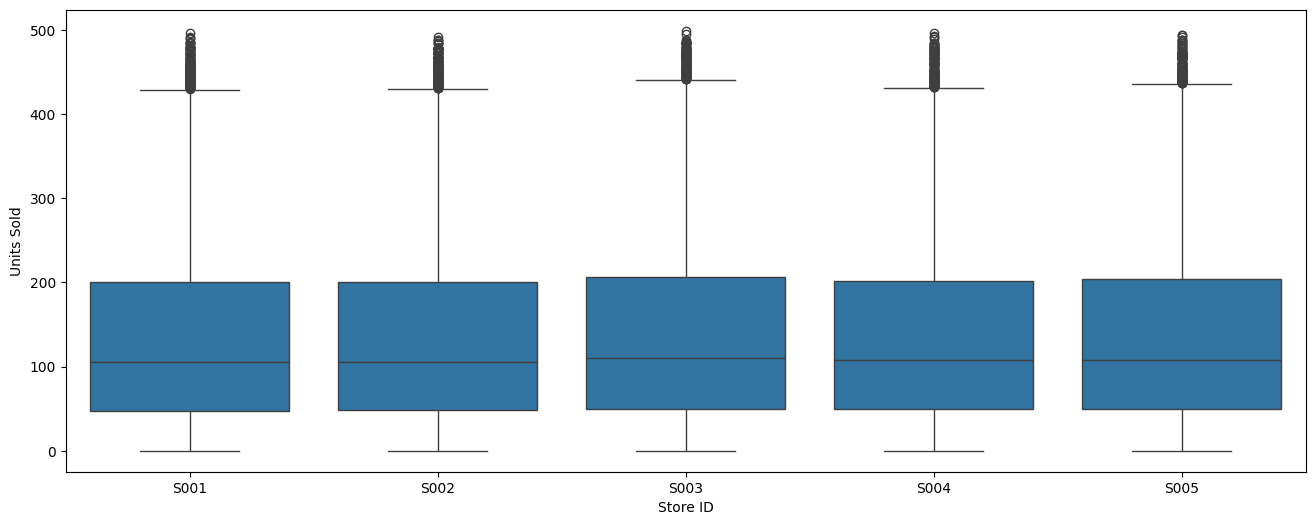

In [21]:
# Graphical representation of the distribution of 'Units Sold' by 'Store ID'
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, x='Store ID', y='Units Sold')

All stores have the similar sells, and similar distributions, we can also see that there are some outliers in every store.

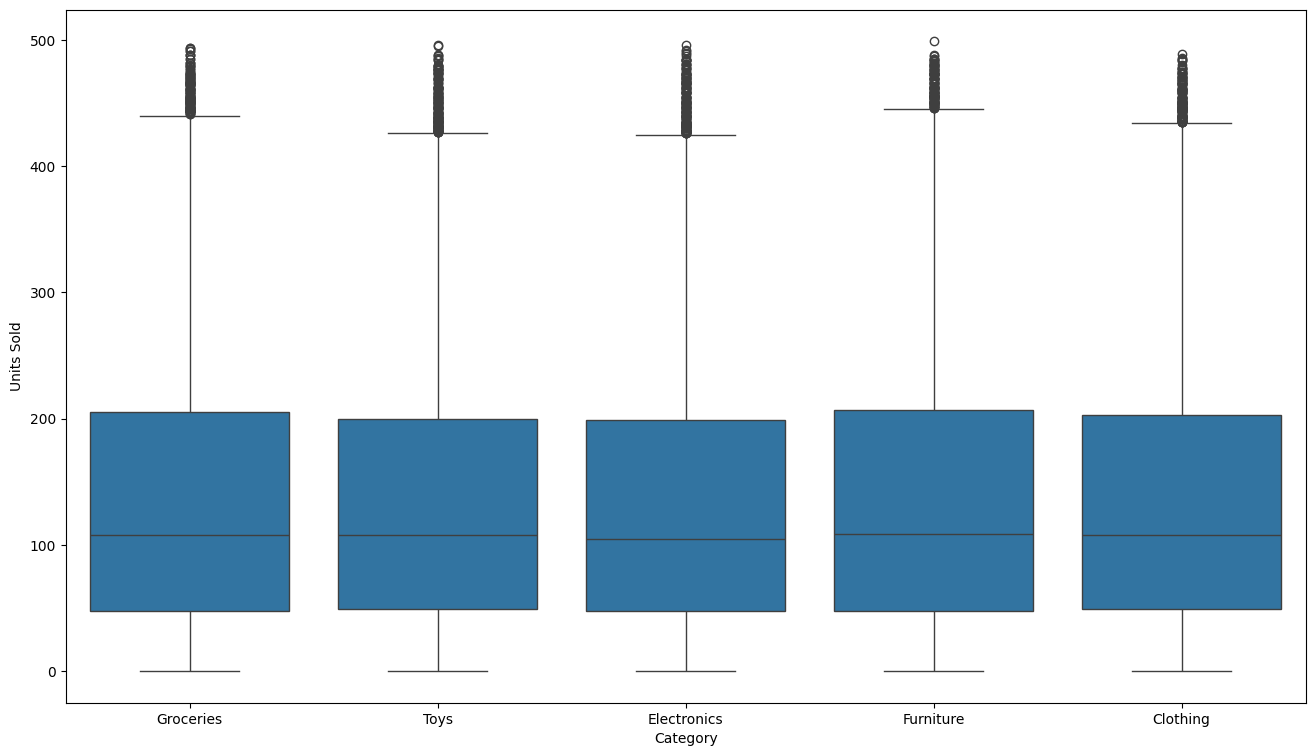

In [20]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=data, x='Category', y='Units Sold')
plt.show()

All categories have similar distributions and outliers

<Axes: xlabel='Store ID', ylabel='count'>

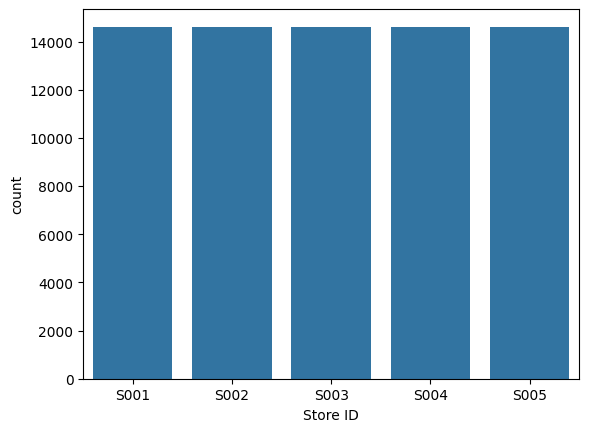

In [25]:
# Graphical representation of the count of 'Store ID'
sns.countplot(data=data, x='Store ID')

There are almost the same amount of data entries for each store

<Axes: xlabel='Product ID', ylabel='count'>

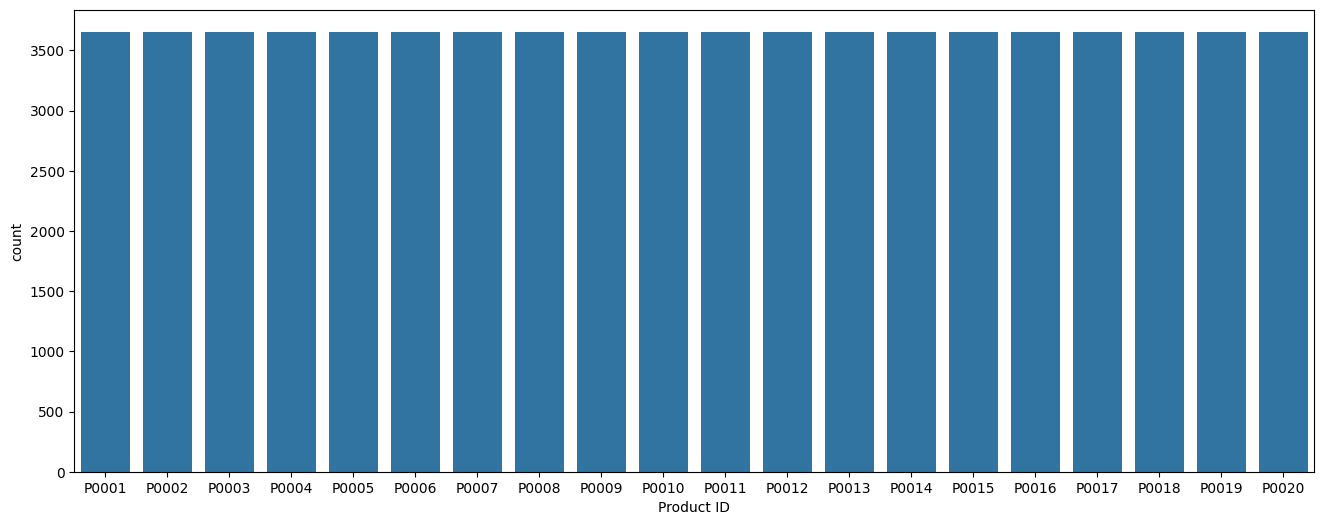

In [29]:
# Graphical representation of the count of 'Product ID'
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='Product ID')

Almost same amount of entries for each product

<Axes: xlabel='Region', ylabel='count'>

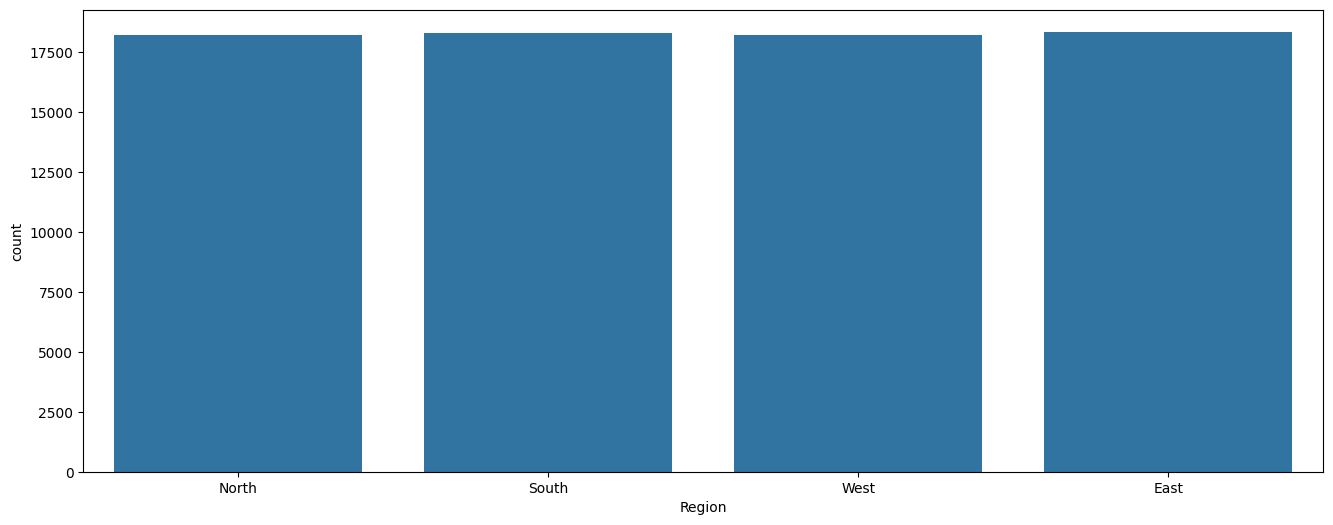

In [30]:
# Graphical representation of the count of 'Region'
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x='Region')

Almost the same amount of entries for each region

# Correlations

<Axes: >

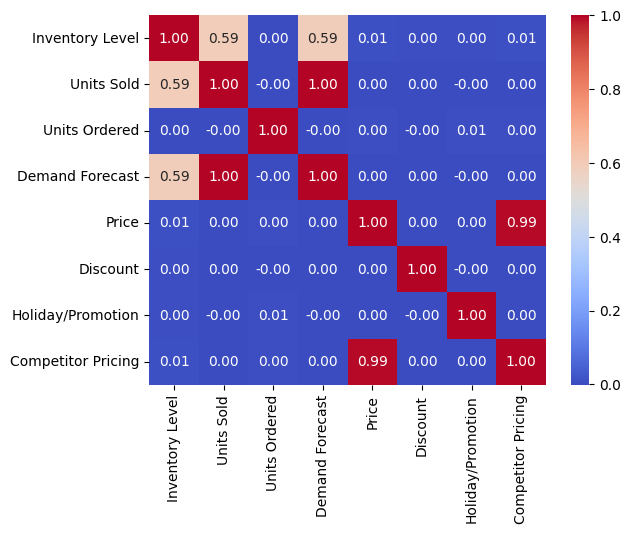

In [5]:
df_numeric  = data.select_dtypes(include='number') # Select only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')

We can observe that there is a direct and perfect correlation between Demand Forecast and Units sold, also there is a strong correlation between price and competitor pricing

# Distributions

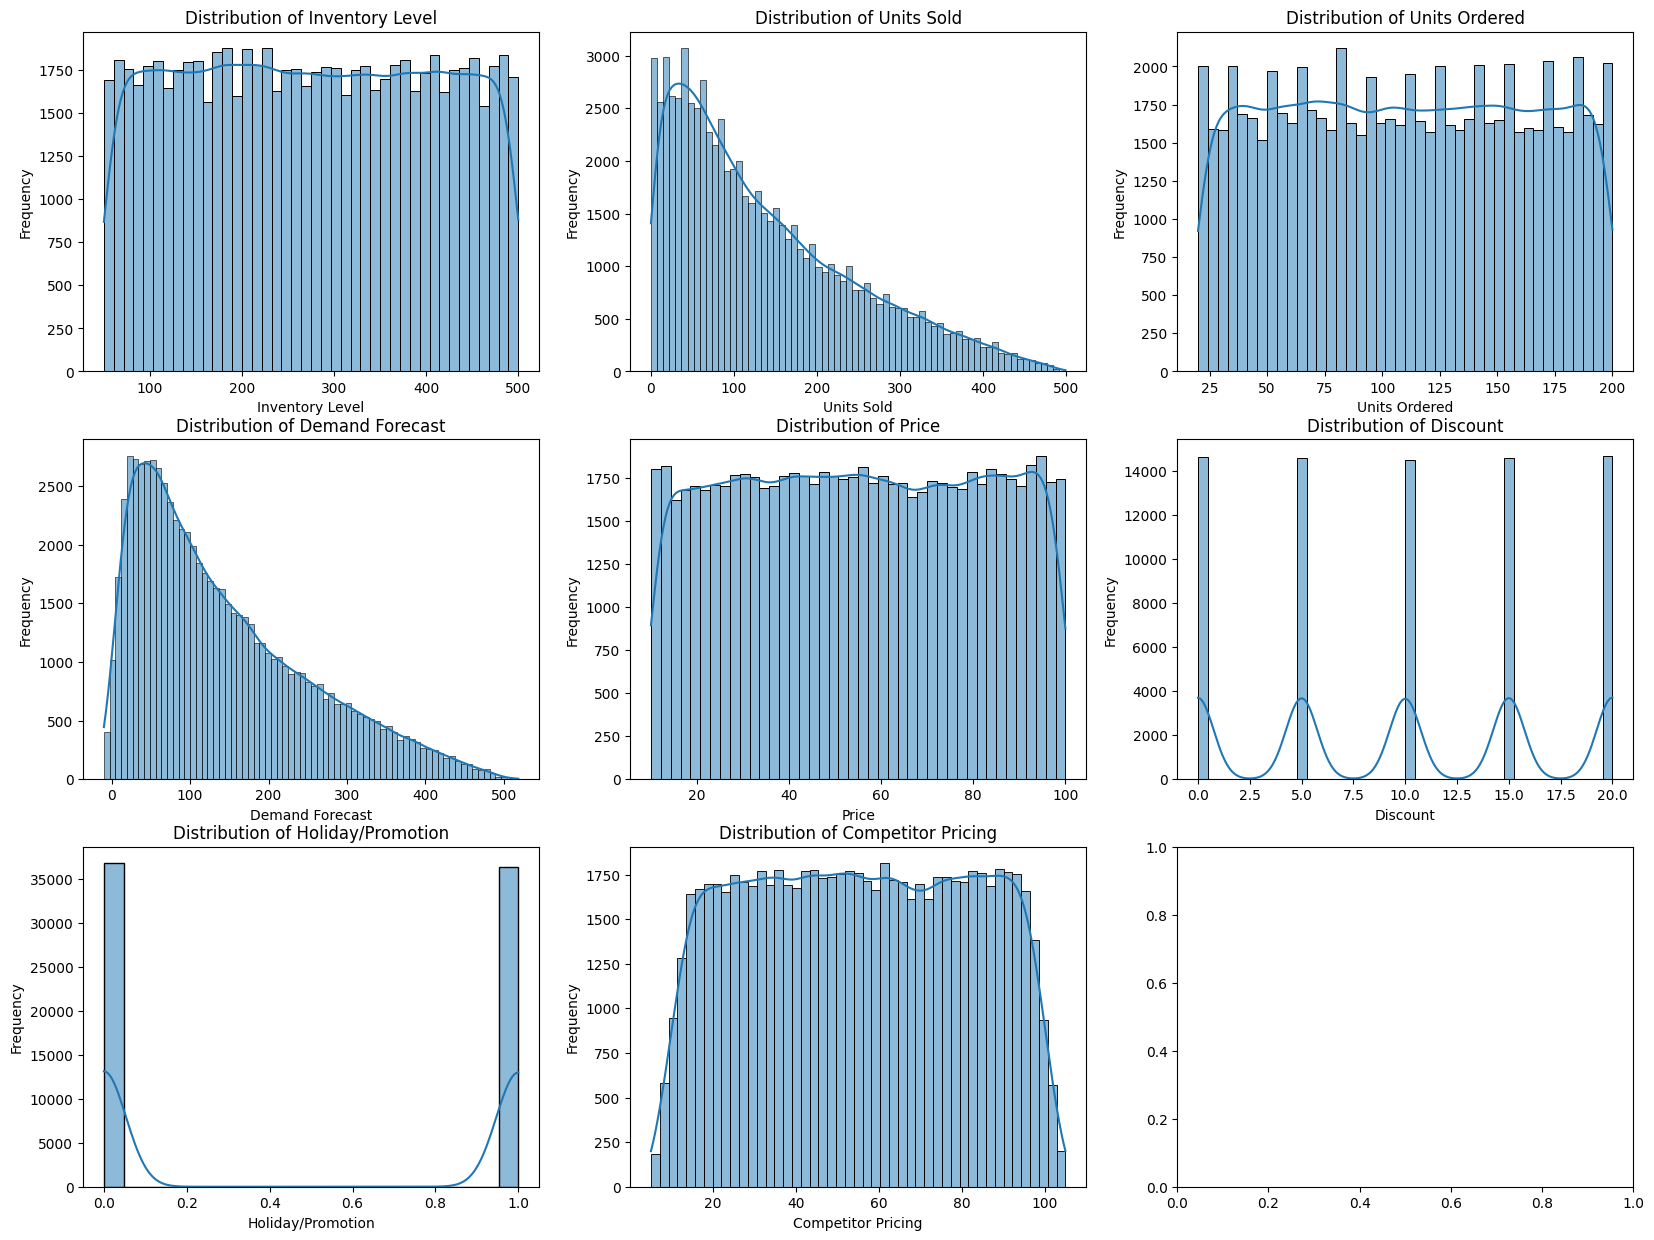

Inventory Level skewness: 0.0101
Units Sold skewness: 0.9053
Units Ordered skewness: 0.0038
Demand Forecast skewness: 0.8949
Price skewness: -0.0027
Discount skewness: -0.0018
Holiday/Promotion skewness: 0.0108
Competitor Pricing skewness: -0.0022


In [ ]:
#Defining number of rows and columns
num_cols = df_numeric.shape[1]
cols = 3 # Columns by row
rows = -(-num_cols // cols ) # Round up division to get the number of rows

# Plotting distributions
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten() # Flatten the axes array for easy indexing

#Plotting each numeric column
for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()

for col in df_numeric.columns:
    print(f'{col} skewness: {df_numeric[col].skew():.4f}')


We can see by the skewness of tha numeric columns hat we have very symmetrical and skewed variables:

Skewed
* Units Sold
* Demand forecast (we will not be using this one)

Symmetrical
* Units ordered
* Price
* Discount
* Holiday
* Competitor pricing

During the preprocessing we will need to normalize this variable

# Time series exploration

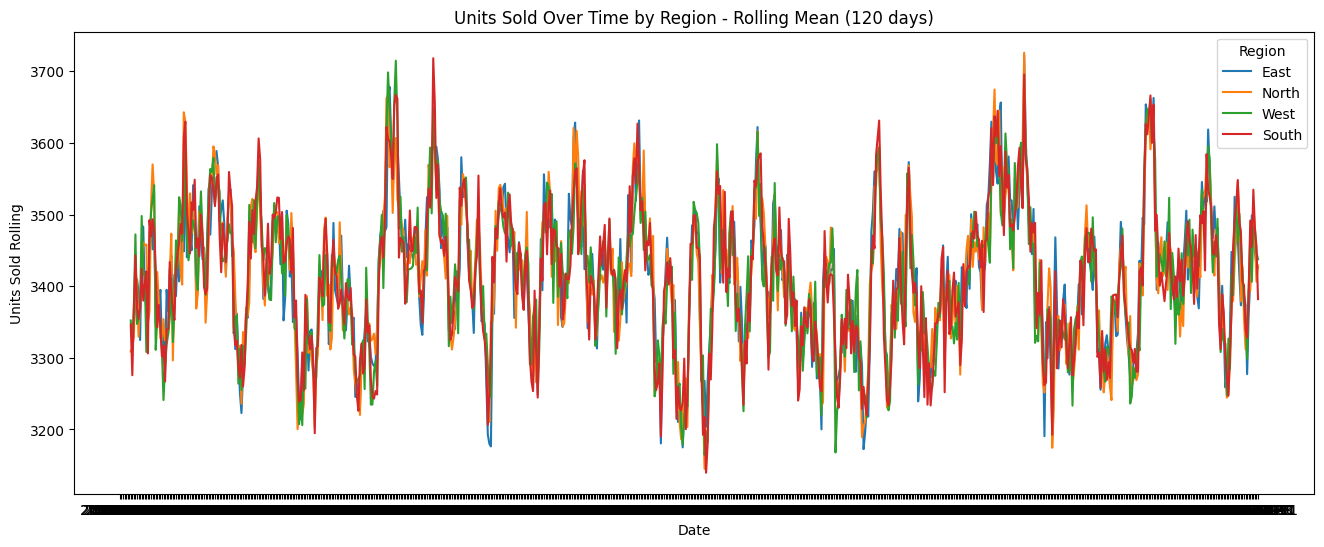

In [143]:
sells_by_region = data.groupby(['Region','Date'])['Units Sold'].sum().reset_index() # Grouping by Region and Date to get total units sold
sells_by_region = sells_by_region.sort_values('Date') # Sorting by Date for better visualization

# Setting a rolling mean for better visualization
sells_by_region['Units Sold Rolling'] = sells_by_region['Units Sold'].rolling(window=30).mean()

plt.figure(figsize=(16, 6))
sns.lineplot(data=sells_by_region, x = 'Date', y='Units Sold Rolling', hue='Region')
plt.title('Units Sold Over Time by Region - Rolling Mean (120 days)')
plt.show()


There is a correlation between sales in each region this could be good news for a multi series model

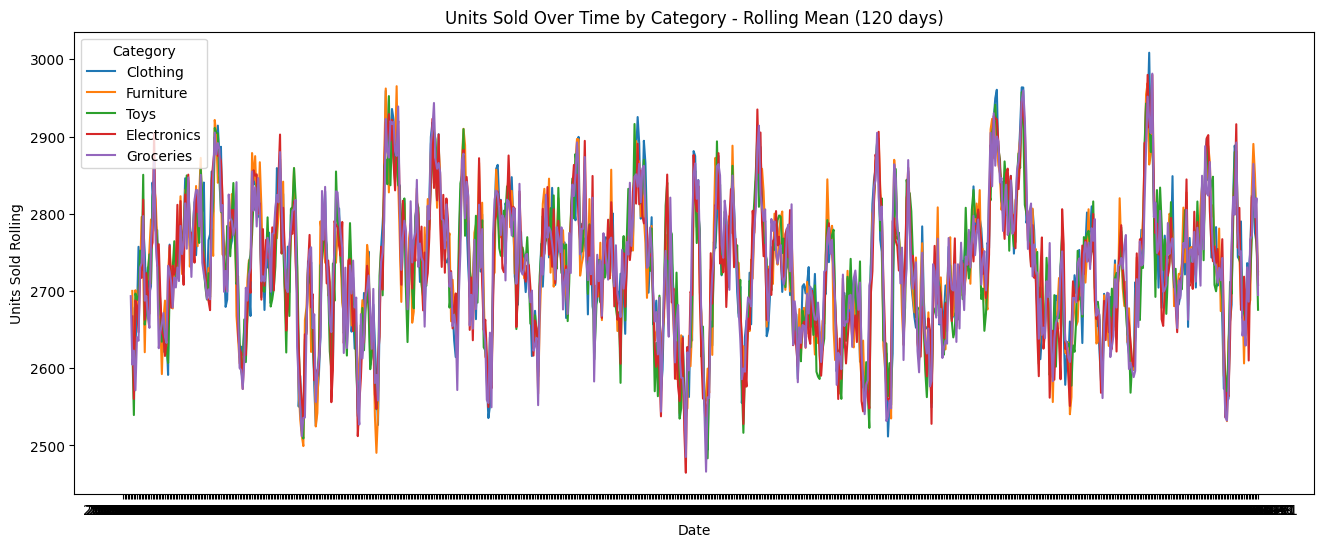

In [ ]:
sells_by_region = data.groupby(['Category','Date'])['Units Sold'].sum().reset_index() # Grouping by Category and Date to get total units sold
sells_by_region = sells_by_region.sort_values('Date') # Sorting by Date for better visualization

# Setting a rolling mean for better visualization
sells_by_region['Units Sold Rolling'] = sells_by_region['Units Sold'].rolling(window=30).mean()

plt.figure(figsize=(16, 6))
sns.lineplot(data=sells_by_region, x = 'Date', y='Units Sold Rolling', hue='Category')
plt.title('Units Sold Over Time by Category - Rolling Mean (120 days)')
plt.show()

We see the same pattern when we group by category, this means that the multiseries model could learn from one series and then apply it to other series

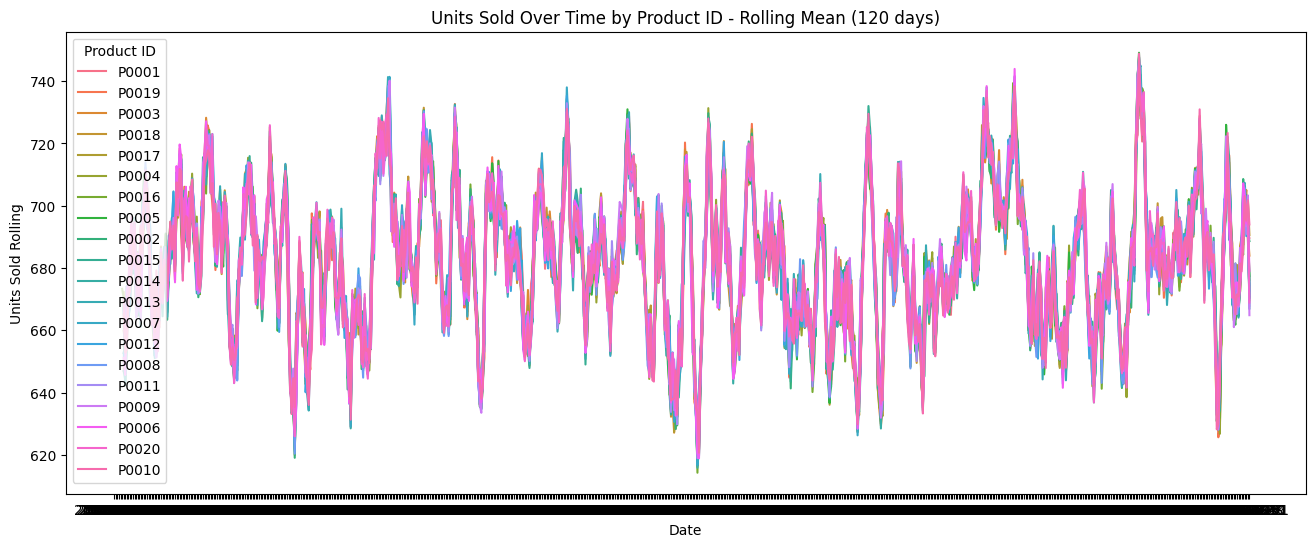

In [ ]:
sells_by_region = data.groupby(['Product ID','Date'])['Units Sold'].sum().reset_index() # Grouping by Product ID and Date to get total units sold
sells_by_region = sells_by_region.sort_values('Date') # Sorting by Date for better visualization

# Setting a rolling mean for better visualization
sells_by_region['Units Sold Rolling'] = sells_by_region['Units Sold'].rolling(window=120).mean() #We use 120 days for better visualization of the trend

plt.figure(figsize=(16, 6))
sns.lineplot(data=sells_by_region, x = 'Date', y='Units Sold Rolling', hue='Product ID')
plt.title('Units Sold Over Time by Product ID - Rolling Mean (120 days)')
plt.show()

As we saw on previos groupbys, there seems to be a similar pattern between products.

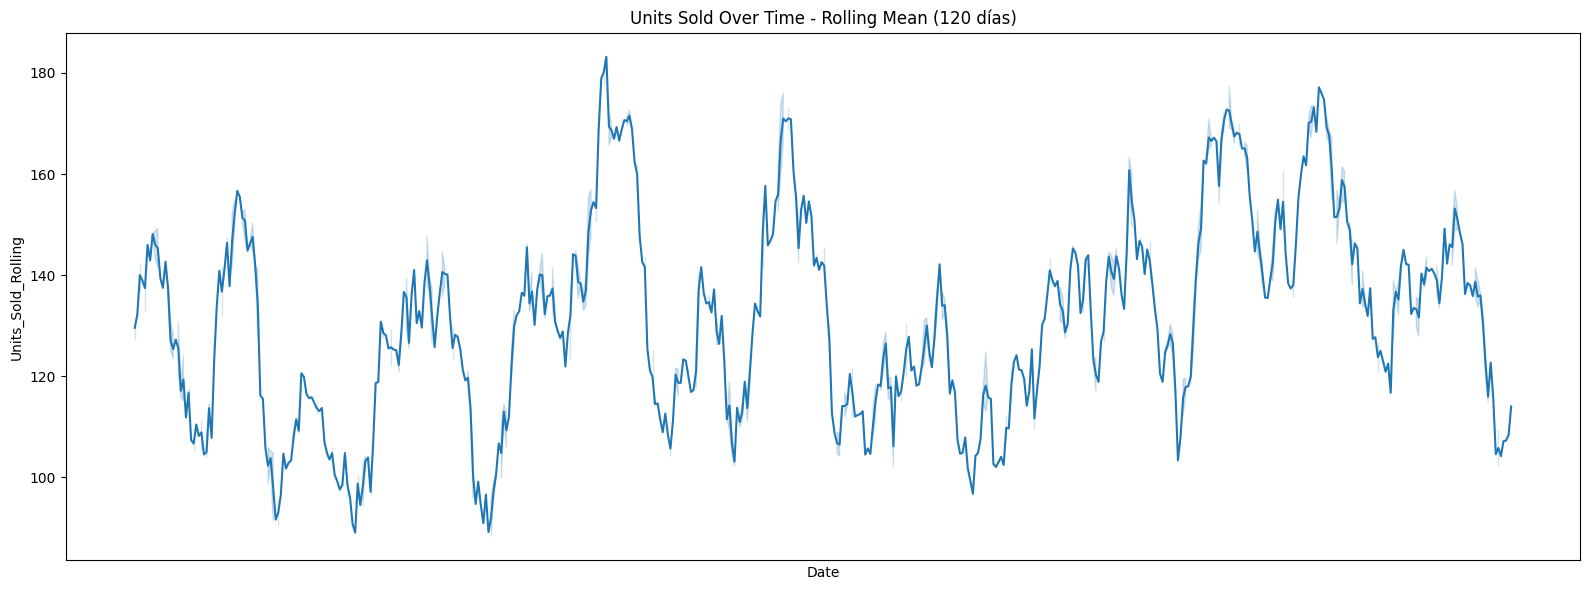

In [ ]:
# We will graph and try to find a pattern in the data for the 'Units Sold' column

# Sorting the data by date  
data_sorted = data[(data['Product ID'] == 'P0001') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

# Creating a new column for rolling mean of 'Units Sold'
data_sorted['Units_Sold_Rolling'] = data_sorted['Units Sold'].rolling(window=30).mean()

# graphing the rolling mean of 'Units Sold'
plt.figure(figsize=(16, 6))
sns.lineplot(data=data_sorted, x='Date', y='Units_Sold_Rolling')
plt.title('Units Sold Over Time - Rolling Mean (120 days)')
plt.xticks([])
plt.tight_layout()
plt.show()


We use a 120-day rolling mean to assess stationarity, identify upward or downward trends, and reduce noise

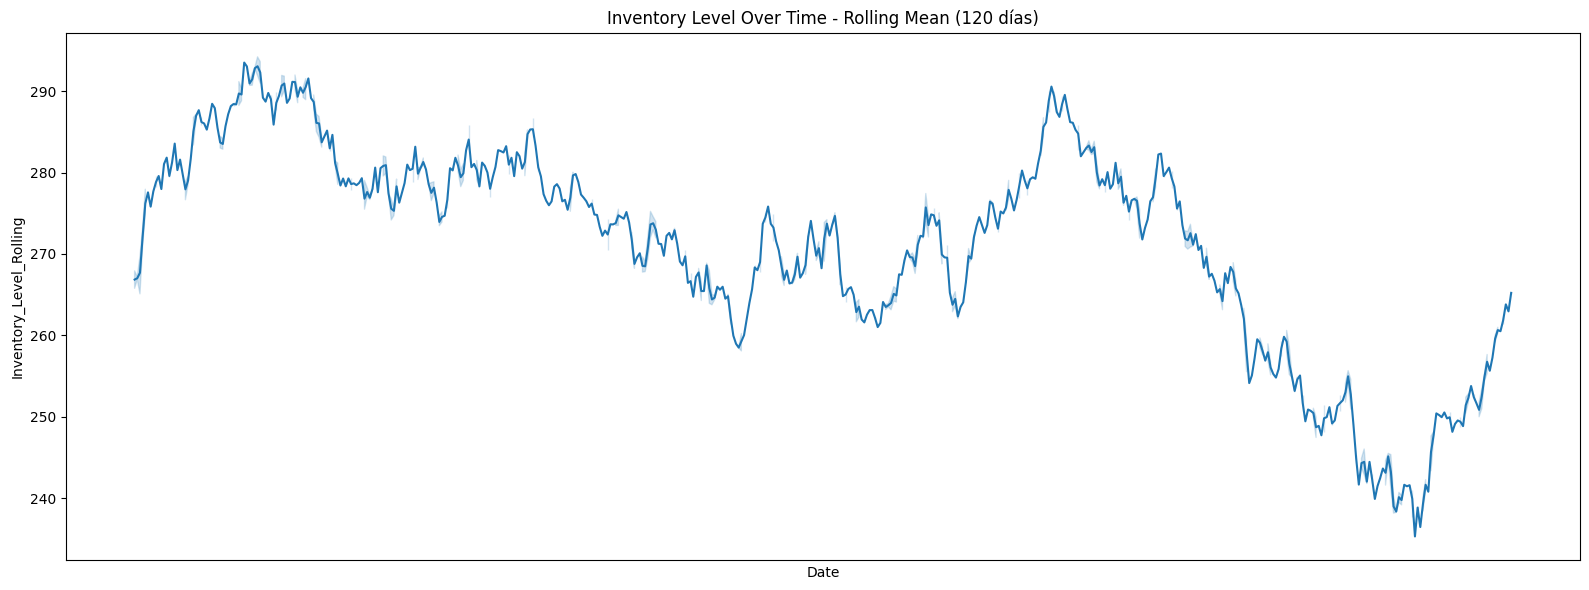

In [ ]:
# We will graph and try to find a pattern in the data for the 'Inventory level' column

# Sorting the data by date
data_sorted = data[(data['Product ID'] == 'P0002') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

# Creating a new column for rolling mean of 'Inventory Level'
data_sorted['Inventory_Level_Rolling'] = data_sorted['Inventory Level'].rolling(window=120).mean()

# graphing the rolling mean of 'Inventory Level'
plt.figure(figsize=(16, 6))
sns.lineplot(data=data_sorted, x='Date', y='Inventory_Level_Rolling')
plt.title('Inventory Level Over Time - Rolling Mean (120 días)')
plt.xticks([])
plt.tight_layout()
plt.show()

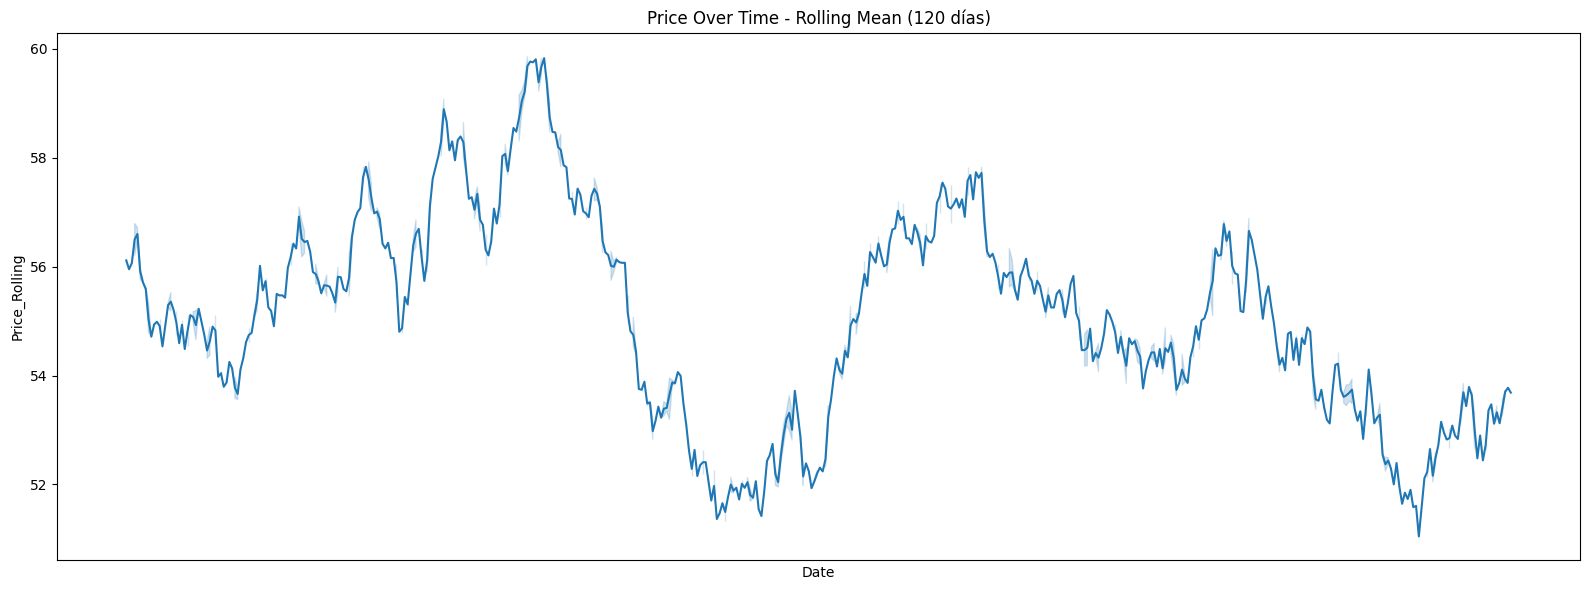

In [ ]:
# We will graph and try to find a pattern in the data for the 'Price' column

# Sorting the data by date
data_sorted = data[(data['Product ID'] == 'P0003') & (data['Region'] == 'South')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

# Creating a new column for rolling mean of 'Price'
data_sorted['Price_Rolling'] = data_sorted['Price'].rolling(window=120).mean()

# graphing the rolling mean of 'Price'
plt.figure(figsize=(16, 6))
sns.lineplot(data=data_sorted, x='Date', y='Price_Rolling')
plt.title('Price Over Time - Rolling Mean (120 días)')
plt.xticks([])
plt.tight_layout()
plt.show()

We cant see a very marked tendency, the sales, inventory and price seems stable, we will need to use other methods to value the seasonality and tendency

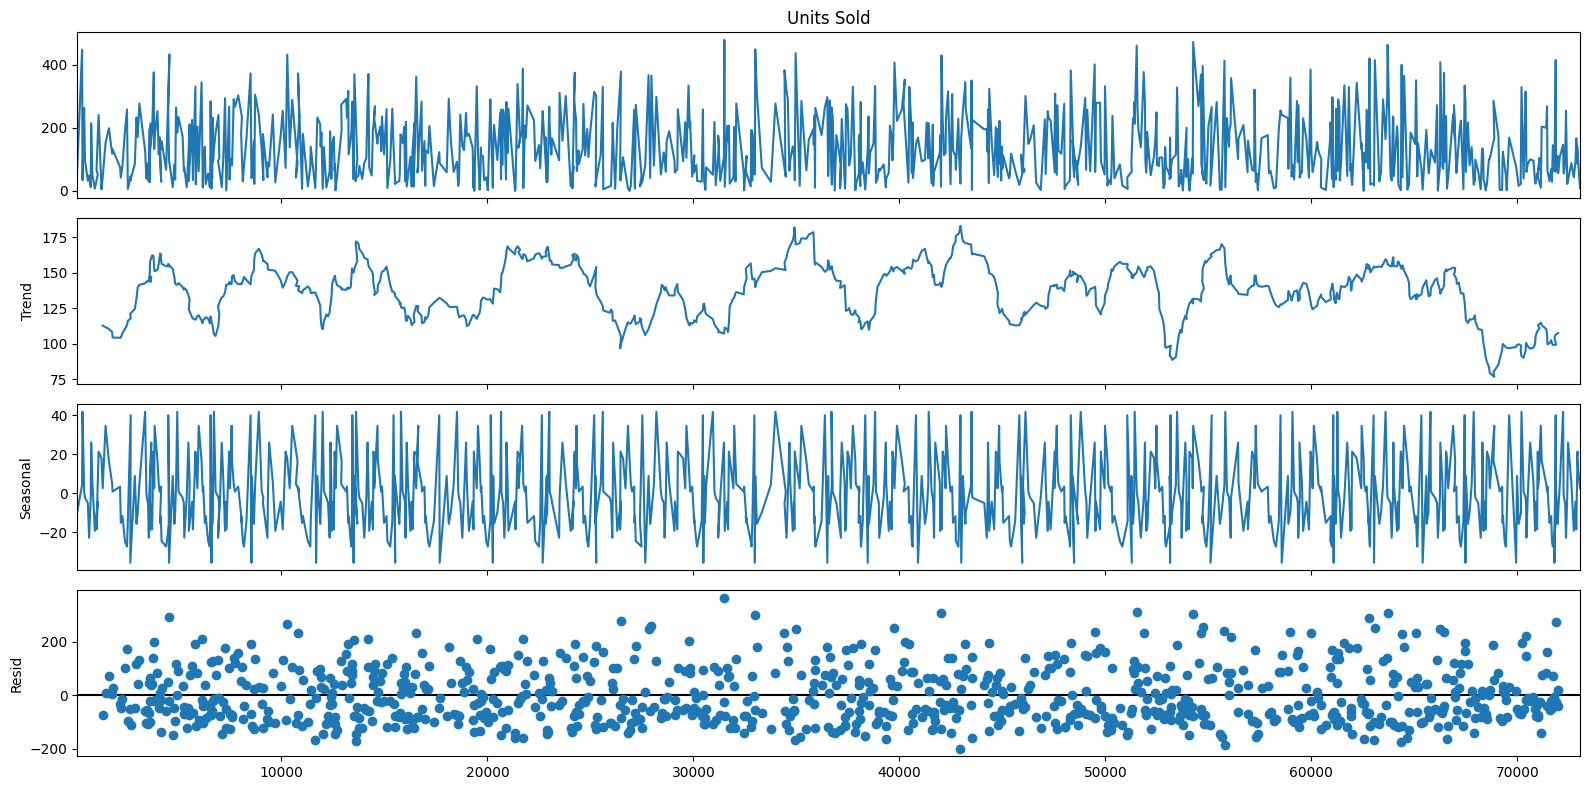

In [156]:
# We will use seasonal decomposition to analyze the trend and seasonality of the data
from statsmodels.tsa.seasonal import seasonal_decompose

# Sorting the data by date
data_sorted = data[(data['Product ID'] == 'P0003') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

series = data_sorted['Units Sold']

decomp = seasonal_decompose(series, model='additive', period=30)

# Plotting the decomposition
fig = decomp.plot()
fig.set_size_inches(16, 8)
plt.tight_layout()
plt.show()

We can observe strong seasonality, a weak trend, and no clear pattern in the residuals, which indicates a good decomposition. There is  weekly and monthly seasonality

<Figure size 1600x600 with 0 Axes>

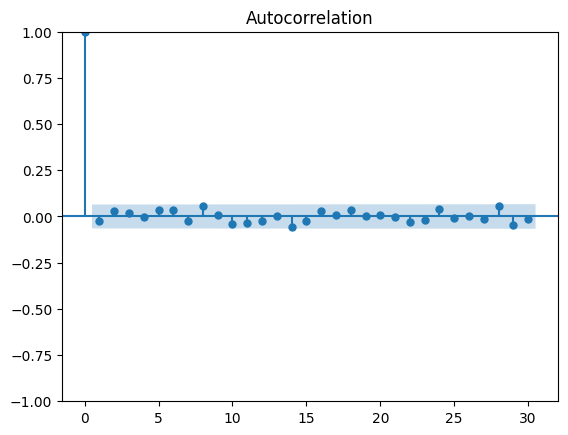

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Determining the autocorrelation of the 'Units Sold' column
data_sorted = data[(data['Product ID'] == 'P0003') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

plt.figure(figsize=(16, 6))
plot_acf(data_sorted['Units Sold'].dropna(), lags=30);

<Figure size 1600x600 with 0 Axes>

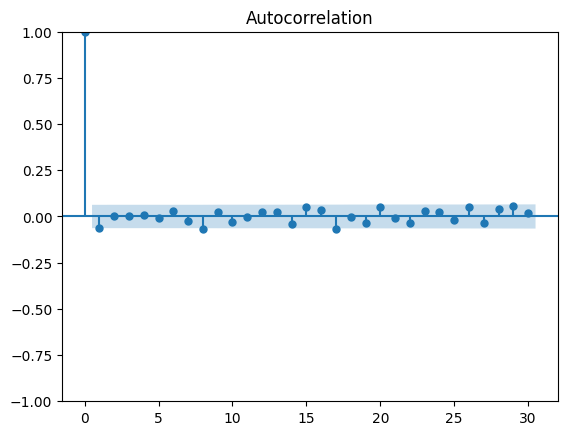

In [160]:
# Determining the autocorrelation of the 'Inventory Level' column
data_sorted = data[(data['Product ID'] == 'P0002') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

plt.figure(figsize=(16, 6))
plot_acf(data_sorted['Inventory Level'].dropna(), lags=30);

<Figure size 1600x600 with 0 Axes>

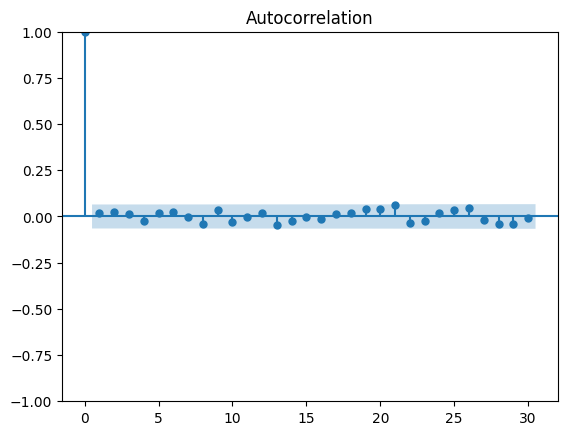

In [159]:
# Determining the autocorrelation of the 'Price' column
data_sorted = data[(data['Product ID'] == 'P0001') & (data['Region'] == 'North')] # We will use only one product and region for simplicity
data_sorted = data_sorted.sort_values('Date').copy()

plt.figure(figsize=(16, 6))
plot_acf(data_sorted['Price'].dropna(), lags=30);

# Conclusion

* Because the data is synthetically produced, the behavior and distribution is similar in the variables.
* We will need to change the data type of the variable "Date".
* We will need to manage the outliers.
* There are no missing values.
* We can possibly use a multiseries model due to the data structure, different products, categories, regions, etc.
* Products, categories, regions have a similar behavior.
* Products sales have a weekly and monthly seasonality and no clear trend
* Some variables are skewed to the right such as "Units Sold" and "Demand forecast", maybe we could use logs to compress this variables.
* Other variables have a normal or centered distribution.
* Same amount of entries for each variable.